In [1]:
import yaml, pickle, h5py, json
from pathlib import Path

import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm

from pprint import pprint

from ax.service.ax_client import AxClient
from ax.utils.notebook.plotting import render, init_notebook_plotting
from ax.plot.contour import plot_contour

%matplotlib notebook

In [2]:
exp_name = 'search_var_2ms_01/'
result_dir = Path('../experiments/optim') / exp_name

assert result_dir.is_dir()
print(result_dir)

../experiments/optim/search_var_2ms_01


In [3]:
ax_client = AxClient(verbose_logging=False)
ax_client = ax_client.load_from_json_file(result_dir / 'search_results.json')

ax_client.generation_strategy.trials_as_df

[INFO 03-02 08:35:53] ax.modelbridge.generation_strategy: Note that parameter values in dataframe are rounded to 2 decimal points; the values in the dataframe are thus not the exact ones suggested by Ax in trials.


,Generation Step,Generation Model,Trial Index,Trial Status,Arm Parameterizations
0,0,Sobol,0,COMPLETED,"{'0_0': {'learning_rate': 0.0, 'max_epochs': 3..."
1,0,Sobol,1,COMPLETED,"{'1_0': {'learning_rate': 0.01, 'max_epochs': ..."
2,0,Sobol,2,COMPLETED,"{'2_0': {'learning_rate': 0.0, 'max_epochs': 3..."
3,0,Sobol,3,COMPLETED,"{'3_0': {'learning_rate': 0.0, 'max_epochs': 2..."
4,0,Sobol,4,COMPLETED,"{'4_0': {'learning_rate': 0.0, 'max_epochs': 3..."
5,0,Sobol,5,COMPLETED,"{'5_0': {'learning_rate': 0.0, 'max_epochs': 3..."
6,0,Sobol,6,COMPLETED,"{'6_0': {'learning_rate': 0.01, 'max_epochs': ..."
7,0,Sobol,7,COMPLETED,"{'7_0': {'learning_rate': 0.01, 'max_epochs': ..."
8,0,Sobol,8,COMPLETED,"{'8_0': {'learning_rate': 0.01, 'max_epochs': ..."
9,0,Sobol,9,COMPLETED,"{'9_0': {'learning_rate': 0.01, 'max_epochs': ..."


In [4]:
print(ax_client.generation_strategy.trials_as_df["Generation Model"].values)

[INFO 03-02 08:35:53] ax.modelbridge.generation_strategy: Note that parameter values in dataframe are rounded to 2 decimal points; the values in the dataframe are thus not the exact ones suggested by Ax in trials.


['Sobol' 'Sobol' 'Sobol' 'Sobol' 'Sobol' 'Sobol' 'Sobol' 'Sobol' 'Sobol'
 'Sobol' 'Sobol' 'Sobol' 'Sobol' 'Sobol' 'Sobol' 'Sobol' 'Sobol' 'Sobol'
 'Sobol' 'Sobol' 'Sobol' 'Sobol' 'Sobol' 'Sobol' 'Sobol' 'Sobol' 'Sobol'
 'Sobol' 'Sobol' 'Sobol' 'BO' 'BO' 'BO' 'BO' 'BO' 'BO' 'BO' 'BO' 'BO' 'BO'
 'BO' 'BO' 'BO' 'BO' 'BO' 'BO' 'BO' 'BO' 'BO' 'BO' 'BO' 'BO' 'BO' 'BO'
 'BO' 'BO' 'BO' 'BO' 'BO' 'BO']


In [5]:
best_parameters, values = ax_client.get_best_parameters()
means, covariances = values
print(means)
print(covariances)

{'reconstruction_error': 3.324603909936945, 'variation_error': 7.286048071330137}
{'reconstruction_error': {'reconstruction_error': 0.04065528849373726, 'variation_error': 0.0}, 'variation_error': {'reconstruction_error': 0.0, 'variation_error': 0.06484378855537218}}


In [6]:
pprint(best_parameters)

{'alpha_max': 0.5608774793751207,
 'batch_size': 512,
 'downsampling_factor': 3,
 'dropout_rate': 0.1,
 'kernel_size': 3,
 'learning_rate': 0.0035762757877171717,
 'max_epochs': 310,
 'wavelet_loss_type': 'mae',
 'weight_decay': 0.003059950373437733}


In [7]:
df = ax_client.get_trials_data_frame()

<IPython.core.display.Javascript object>


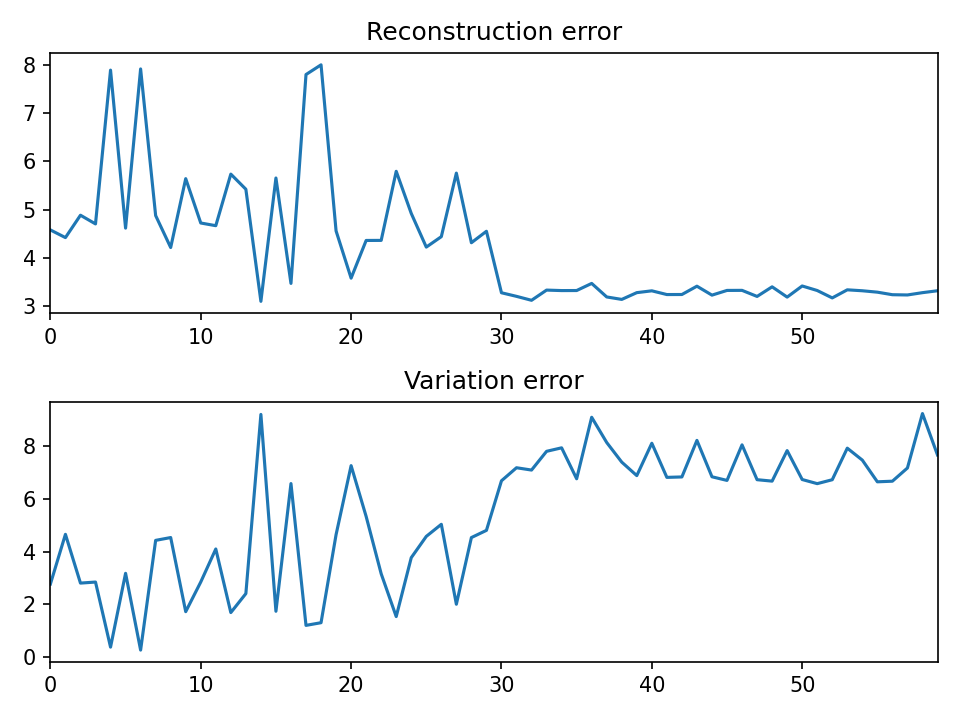

In [8]:
fig, axes  = plt.subplots(2,1)
tidx = df['trial_index']
axes[0].plot(tidx, df['reconstruction_error'])
axes[0].set_title("Reconstruction error")
axes[1].plot(tidx, df['variation_error'])
axes[1].set_title("Variation error")



for ax in axes:
    ax.set_xlim([tidx.values[0], tidx.values[-1]])
    
fig.tight_layout()

In [9]:
df.sort_values(by=['reconstruction_error', 'variation_error'], inplace=True)
df.drop(columns=['trial_index', 'arm_name'], inplace=True)
#df[:10][:]
df.tail(n=10)

,reconstruction_error,variation_error,learning_rate,max_epochs,alpha_max,weight_decay,dropout_rate,wavelet_loss_type,kernel_size,downsampling_factor,batch_size
5,5.420333,2.412740,0.008962,296,0.099800,0.008260,0.144520,mae,3,2,512
59,5.639423,1.728164,0.006457,332,0.303615,0.002990,0.228910,mse,3,2,512
7,5.652998,1.742997,0.007378,317,0.461855,0.006883,0.140273,mse,3,2,512
4,5.733473,1.693832,0.007703,309,0.518560,0.009990,0.202226,mse,3,3,512
20,5.754255,2.009319,0.008979,293,0.069705,0.007074,0.258463,mse,3,2,512
16,5.791475,1.542442,0.005253,325,0.149337,0.008398,0.264868,mse,3,3,512
9,7.794519,1.208586,0.009178,342,0.726578,0.000455,0.374943,mae,3,2,512
39,7.886009,0.384613,0.004892,328,0.385197,0.000286,0.365582,mse,3,3,512
56,7.910681,0.271930,0.009056,350,0.888793,0.001221,0.250512,mse,3,2,512
10,7.995645,1.309682,0.009828,294,0.149957,0.001508,0.252461,mse,3,3,512


In [10]:
#ax_client.create_experiment?